In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/Titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#BASIC INFO

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

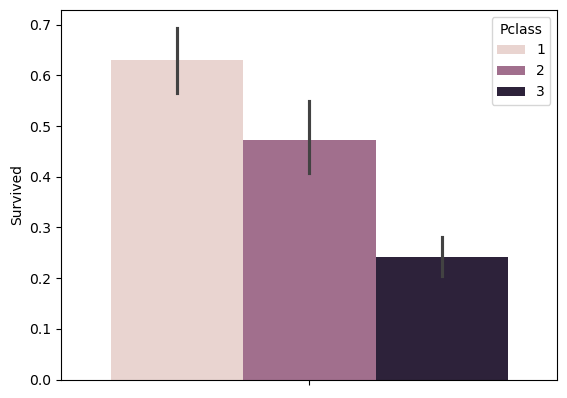

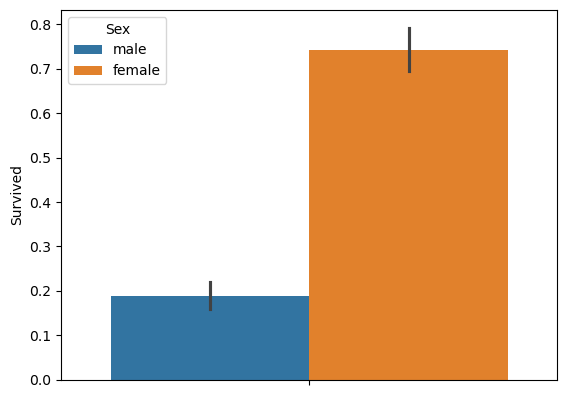

In [6]:
sns.barplot(data = df , y ="Survived" , hue = "Pclass")
plt.show()
sns.barplot(data = df , y ="Survived" , hue = "Sex")
plt.show()

In [7]:
#MISSING VALUE HANDLING
#
#
#
#

In [8]:
df.drop(columns = ['Cabin'] , inplace = True)

df.drop(columns = ['Ticket'] , inplace = True)


In [9]:
#Filling the Embarked with mode of the column
df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)
df['Age'].fillna(df['Age'].median(),inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26364\3125485252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0] , inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26364\3125485252.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [10]:
df['Survived'].mode()[0]    #Major proportion died

np.int64(0)

In [11]:
df['AgeRange'] = pd.cut(df['Age'] , bins = [8 , 16 , 21 , 35 , 60 , 100])

<Axes: xlabel='AgeRange'>

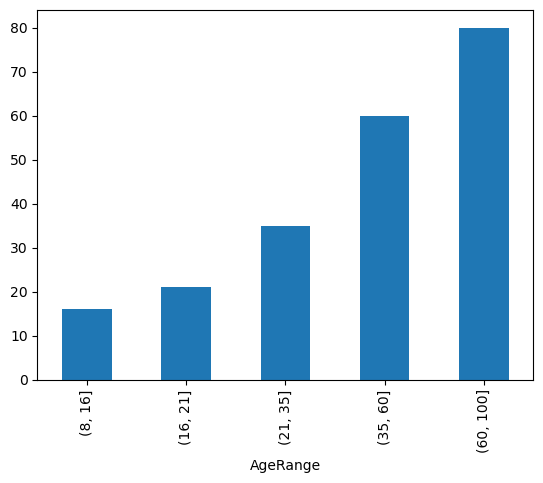

In [12]:
#Group Age by AgeRange , computes max of AgeRange and then plots
df.groupby('AgeRange' , observed = True)['Age'].max().plot(kind='bar')

In [13]:
#FEATURE ENGINEERING
#
#
#
#

In [14]:
df["Single"] = (df['SibSp'] == 0).astype(int)
df["FamilySIze"] = 1+ df["SibSp"] + df["Parch"]
df["Title"] = df["Name"].str.extract(r' ([A-Z a-z]+)\.' , expand = False) 
#df['Title'] = df['Name'].str.extract(r'(?<=,)(.*)\.', expand=False) , this works too

In [15]:
df.drop(columns="Name" , inplace = True)

In [16]:
df.drop(columns = "PassengerId" , inplace = True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange,Single,FamilySIze,Title
0,0,3,male,22.0,1,0,7.2500,S,"(21, 35]",0,2,Mr
1,1,1,female,38.0,1,0,71.2833,C,"(35, 60]",0,2,Mrs
2,1,3,female,26.0,0,0,7.9250,S,"(21, 35]",1,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,"(21, 35]",0,2,Mrs
4,0,3,male,35.0,0,0,8.0500,S,"(21, 35]",1,1,Mr


In [18]:
#ENCODING
#
#
#
#

In [19]:
df["Male"] = (df["Sex"] == 'male').astype(int) 

In [20]:
df.drop(columns = "Sex" , inplace = True)

In [21]:
df['Embarked'] = df['Embarked'].map({'S' : 1 , 'C' : 2 , 'Q' : 3}) 

In [22]:
df['Title'] = df['Title'].map({'Mr' : 1 , 'Mrs' : 2 , 'Miss' : 3})

In [23]:
df['Title'] = df['Title'].fillna(0).astype(int)
df['Age'] = df['Age'].fillna(0).astype(int)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,AgeRange,Single,FamilySIze,Title,Male
0,0,3,22,1,0,7.2500,1,"(21, 35]",0,2,1,1
1,1,1,38,1,0,71.2833,2,"(35, 60]",0,2,2,0
2,1,3,26,0,0,7.9250,1,"(21, 35]",1,1,3,0
3,1,1,35,1,0,53.1000,1,"(21, 35]",0,2,2,0
4,0,3,35,0,0,8.0500,1,"(21, 35]",1,1,1,1


In [25]:
#ONTO TRAINING MODELS
#
#
#
#

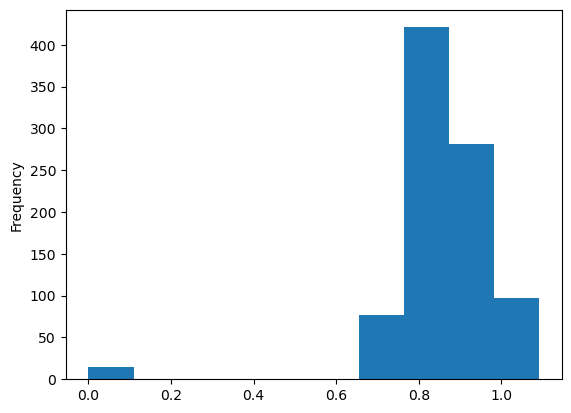

In [31]:
df["Fare"] = np.log1p(df["Fare"])
df["Fare"].plot(kind = 'hist')
df.drop(columns='AgeRange' , inplace = True)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('Survived' , axis = 1)
y = df['Survived']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 45)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression(max_iter = 250)
model.fit(X_train , y_train)

pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8491620111731844

In [64]:
confusion_matrix(y_test,pred)

array([[103,  14],
       [ 13,  49]])

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200 , random_state = 10)
rf.fit(X_train,y_train)

rf_pred = model.predict(X_test)
accuracy_score(y_test,rf_pred)

0.8491620111731844

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estim)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
